<a href="https://colab.research.google.com/github/Slivak/ML-1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22ML_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **💢 АЛГОРИТМ МАШИННОГО ОБУЧЕНИЯ С НЕСКОЛЬКИМИ ВХОДАМИ И ВЫХОДАМИ 💢**

In [ ]:
import numpy as np

In [ ]:
#Все необходимые данные
weights_matrix = [
    [0.1, 3, 2],
    [0.346, 3.65, 2.34],
    [0.6, 0.98, 1],
]

games = [8, 9, 10, 12]
victories = [5, 2, 0.6, 0.8]
fans = [44, 63.5, 0.8, 1.0]

input_data = [games[0], victories[0], fans[0]]

goal_pred = [0.1, 0.11, 0.56]
alpha = 0.01
error = []
delta = []

In [ ]:
#функция для вычисления скалярного произведения(одного)
#Скаляр массива и input_data

def weighted_sum(vector_a, vector_b):
  prediction = 0
  #проходя по списку добавляем скаляр в переменную prediction
  for i in range(len(vector_a)):
    prediction += (vector_a[i]*vector_b[i])
  return prediction

In [ ]:
#Функция, образовывающая 3 скалярных произведения

def shape_prediction_vector(input_data, weights_matrix):
  prediction_vector = []
  for i in range(len(input_data)):
    #вызываем функцию для вычесления одного скаляра по длине input_data
    #параметры: наши данные, массив из матрицы весов
    prediction_vector.append(weighted_sum(input_data, weights_matrix[i]))
  return prediction_vector
prediction = shape_prediction_vector(input_data, weights_matrix)

In [ ]:
for i in range(len(goal_pred)):
  #получение ошибки в квадрате
  error.append((prediction[i] - goal_pred[i])**2)
  #получение разницы и направленности между предсказанием и целью
  delta.append(prediction[i]-goal_pred[i])

In [ ]:
#нахождение производных

def calc_derivatives(delta, input_data):
  #матрица нулей по размерам: длина массива delta × длина массива input_data
  #ВАЖНО! первый аргумент - это высота (y), второй-длина(x)
  derivatives = np.zeros((len(delta), len(input_data)))
  for i in range(len(delta)):
    for j in range(len(input_data)):
      #derivatives[i][j], так как используется двумерный массив
      #мы меняем нули на производные
      derivatives[i][j] = delta[i] * input_data[j]
  return derivatives

derivatives_matrix = calc_derivatives(delta, input_data)

In [ ]:
#коррекция матрицы весов
for i in range(len(weights_matrix)):
  for j in range(len(weights_matrix[0])):
    weights_matrix[i][j] -= alpha*derivatives_matrix[i][j]

In [ ]:
print(f"Ошибка: {error}")
print(f"Веса: {weights_matrix}")
print(f"Производные: {derivatives_matrix}")

Ошибка: [10753.69, 15343.281423999999, 2823.8596000000002]
Веса: [[-8.196000000000002, -2.1850000000000005, -43.628], [-9.56344, -2.5433999999999997, -52.161919999999995], [-3.6512, -1.677, -22.3816]]
Производные: [[ 829.6    518.5   4562.8  ]
 [ 990.944  619.34  5450.192]
 [ 425.12   265.7   2338.16 ]]


Производная - скорость изменения каких-либо значений
А так же отражение зависимости переменных

Проще: чувствительность одной переменной к изменению другой

# ⚡ **У НАС ТУТ ПРОИЗВОДНАЯ ПОКАЗЫВАЕТ КАК БЫСТРО МЕНЯЕТСЯ ОШИБКА ПРИ ИЗМЕНЕНИИ ВЕСА** ⚡

![minimum-funkcii-570x309[1].png](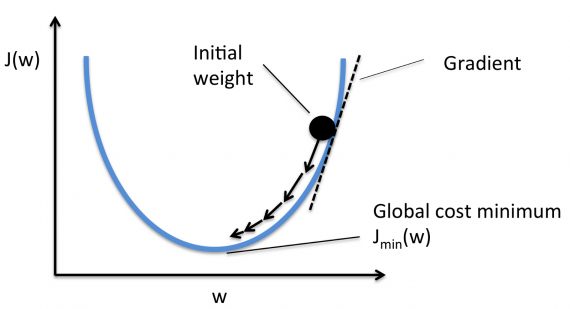)




gradient - direction_and_amount (Отражение направления веса)
weight_delta - weight/error
weight -= weight_delta

Мы считаем производную weight_delta (Если weight_delta < 0, то есть вес < нужный вес, то - на - даст + (weight + weight_delta), то есть он изменяет вес в нужную сторону и как надо!

Вот и весь градиентный спуск

# **☢ КАЛ V 2.0 ☢**


1.   Видео о производной: https://www.youtube.com/watch?v=w4Bl7NnMMMo&ab_channel=SciencePub

2.   Доки у меня на раб.столе

3.  # МЭМУС





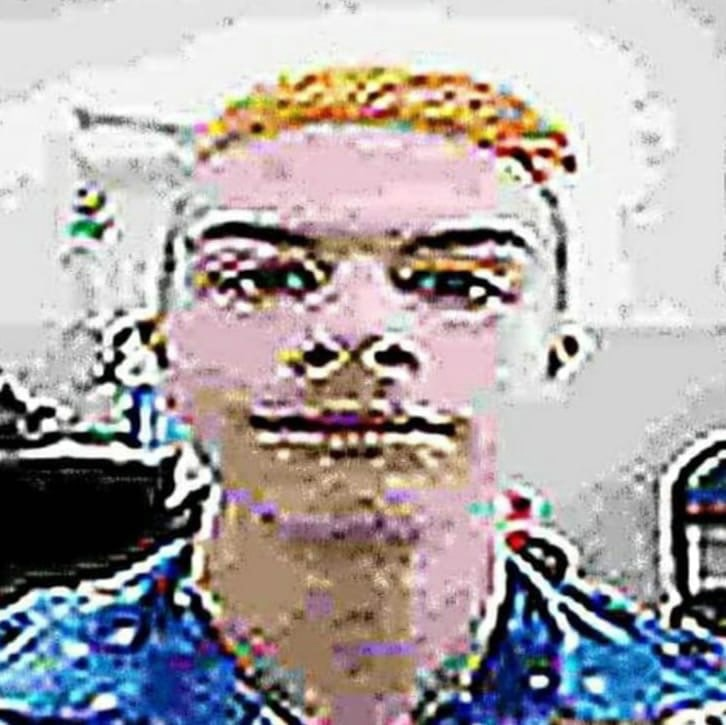